In [2]:
from earlyexitnet.training_tools.train import get_model
from earlyexitnet.tools import load_model, CIFAR10DataColl
import torch

# model_path = '../trained_models/b_lenet_cifar10.pth'

# model = get_model("b_lenet_cifar")

model_path = '../../earlyexitnet/trained_models/resnet8_2ee_230721.pth'

model = get_model("resnet8_2ee")
load_model(model, model_path,device=torch.device('cpu'))

Classif @ 0 linear dim: 512
Model done: resnet8_2ee


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

BATCH_SIZE = 40

datacoll = CIFAR10DataColl(batch_size_test=BATCH_SIZE)
test_dl = datacoll.get_test_dl()


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data/cifar10/cifar-10-python.tar.gz to ../data/cifar10
Files already downloaded and verified


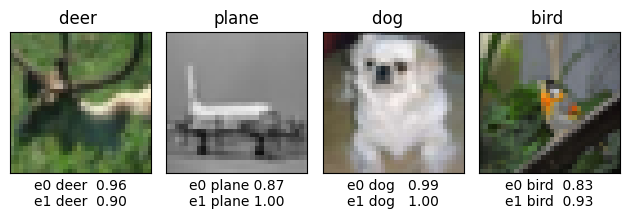

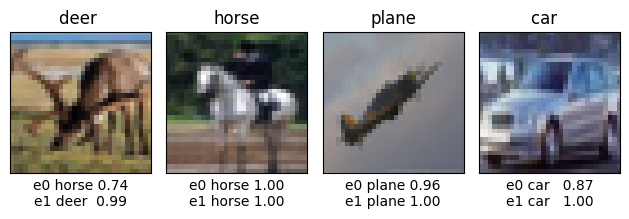

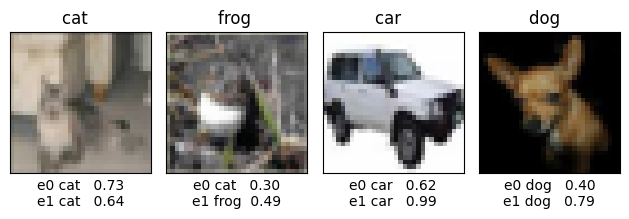

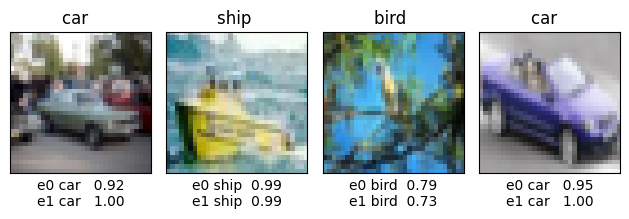

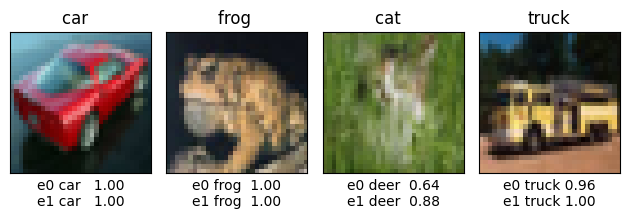

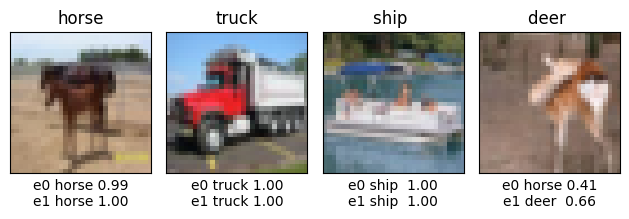

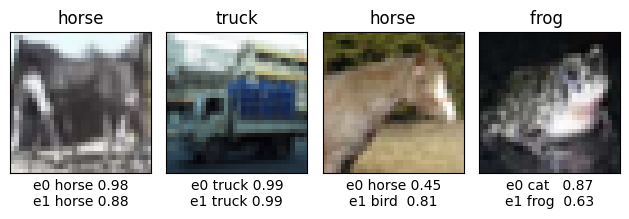

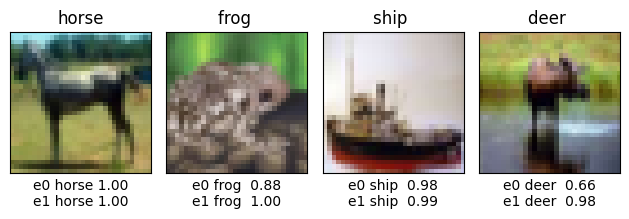

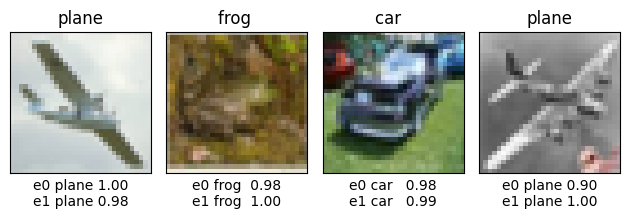

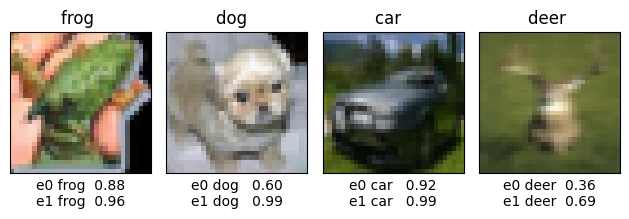

In [4]:
# %matplotlib ipympl needs ipywidgets
import math
from IPython.core.debugger import set_trace

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img, ncols=1, label=None, caption=None):
    # img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    num_img = npimg.shape[0]
    
    nrows = math.ceil(num_img / ncols)
    
    img_track = 0
    
    for row in range(nrows):
        fig, axs = plt.subplots(nrows=1, ncols=ncols,
                                subplot_kw={'xticks': [], 'yticks': []})
        
        for ax in axs:
            if img_track < num_img:
                ax.imshow(np.transpose(npimg[img_track], (1, 2, 0)))
                if label is not None:
                    ax.set_title(label[img_track])
                if caption is not None:
                    ax.set_xlabel(caption[img_track])
            img_track += 1
            
        plt.tight_layout()
        # plt.imshow(np.transpose(npimg, (1, 1, 1)))
        plt.show()

def getcaption(images, model):
    model.eval()
    captions = ['' for i in range(BATCH_SIZE)]
    with torch.no_grad():
        result = model.forward(images)
        sftmx = torch.max(torch.softmax(result, dim=-1),dim=-1).values
        res_max = result.max(dim=-1).values
        res_arg_max = result.max(dim=-1).indices
        for exit_num, (max, arg_max) in enumerate(zip(sftmx, res_arg_max)):
            for i, (max_val, index) in enumerate(zip(max, arg_max)):
                captions[i] += f"e{exit_num} {classes[index]:5s} {max_val:.02f}"
                if exit_num != model.exit_num - 1:
                    captions[i] += '\n'
    return captions
# get some random training images
dataiter = iter(test_dl)
images, labels = next(dataiter)


# show images
imshow(images, ncols=4, label=[f'{classes[label]:5s}' for label in labels], caption=getcaption(images, model))
